# ShopSmart: E-commerce Behavior Analysis and Customer Segmentation

In [1]:
# Import the necessary libraries and modules
import numpy as np
import pandas as pd

In [2]:
# Import the file into Jupiter as e_commerce dataframe
e_commerce = pd.read_csv("./Ecommerce_Data.csv")

**Data Inspection** 

In [3]:
# Inspect the first few 20 rows of the dataset
print(e_commerce.head(20))

    Customer_ID  Age  Gender  Purchase_Count  Average_Spending  \
0             1   52   Other               3         92.890547   
1             2   25    Male               5        241.347473   
2             3   29    Male               8        259.647912   
3             4   47   Other               9        104.586001   
4             5   59   Other               3         26.102376   
5             6   35    Male               8        208.676964   
6             7   62   Other               2         50.736286   
7             8   48   Other               5        134.303802   
8             9   48   Other               4         36.205989   
9            10   63   Other               5        148.396827   
10           11   64    Male               6        104.892454   
11           12   28    Male               6         65.292160   
12           13   42    Male               2        181.524266   
13           14   35   Other              10        151.792295   
14        

In [4]:
# Look at a concise summary of the dataframe
print(e_commerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             19000 non-null  int64  
 1   Age                     19000 non-null  int64  
 2   Gender                  19000 non-null  object 
 3   Purchase_Count          19000 non-null  int64  
 4   Average_Spending        19000 non-null  float64
 5   Product_Category        19000 non-null  object 
 6   Visit_Frequency         19000 non-null  int64  
 7   Last_Visit              19000 non-null  int64  
 8   Customer_Loyalty_Score  19000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB
None


In [5]:
# Check for any missing values in each column
print(e_commerce.isnull().sum())

Customer_ID               0
Age                       0
Gender                    0
Purchase_Count            0
Average_Spending          0
Product_Category          0
Visit_Frequency           0
Last_Visit                0
Customer_Loyalty_Score    0
dtype: int64


In [6]:
# Check basic statistics to identify any obvious outliers or errors in the dataset
print(e_commerce.describe())

        Customer_ID           Age  Purchase_Count  Average_Spending  \
count  19000.000000  19000.000000    19000.000000      19000.000000   
mean    9500.500000     41.094842        5.001105        100.719551   
std     5484.971893     13.543642        2.240042        100.560898   
min        1.000000     18.000000        0.000000          0.019505   
25%     4750.750000     29.000000        3.000000         29.064186   
50%     9500.500000     41.000000        5.000000         70.512353   
75%    14250.250000     53.000000        6.000000        140.410647   
max    19000.000000     64.000000       17.000000        932.470620   

       Visit_Frequency    Last_Visit  Customer_Loyalty_Score  
count     19000.000000  19000.000000            19000.000000  
mean          1.984684     14.887895                4.970632  
std           1.403577      8.362923                2.590350  
min           0.000000      1.000000                1.000000  
25%           1.000000      8.000000         

In [7]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows:", e_commerce.duplicated().sum())

Number of duplicate rows: 0


In [8]:
# Check unique values for 'Gender' to ensure data consistency
print("Unique values in 'Gender':", e_commerce['Gender'].unique())

Unique values in 'Gender': ['Other' 'Male' 'Female']


**About GENDER, I assume people who entered "Other" may not want to specify their gender for some reasons**

In [9]:
# Check if any age values are outside expected range (e.g., 18-100)
print("Age values outside of 18-64:", e_commerce[(e_commerce['Age'] < 18) | (e_commerce['Age'] > 64)])

Age values outside of 18-64: Empty DataFrame
Columns: [Customer_ID, Age, Gender, Purchase_Count, Average_Spending, Product_Category, Visit_Frequency, Last_Visit, Customer_Loyalty_Score]
Index: []


In [10]:
# Print current data types
print(e_commerce.dtypes)

Customer_ID                 int64
Age                         int64
Gender                     object
Purchase_Count              int64
Average_Spending          float64
Product_Category           object
Visit_Frequency             int64
Last_Visit                  int64
Customer_Loyalty_Score      int64
dtype: object


**I had earlier cleaned the data using Excel. So, I expected it to be clean just as confirmed through the above steps**

# Key Questions

1. Who are the most valuable customers?

2. What factors influence customer loyalty?

3. How does customer behavior vary by demographic?

4. Can we predict future purchase behavior based on past activity?

5. What are the common segments of customers and how can marketing be tailored to each?

# 1. Who are the most valuable customers?

In [11]:
# Calculate customer value first of all
e_commerce['Customer_Value'] = e_commerce['Purchase_Count'] * e_commerce['Average_Spending']

In [12]:
# Sort customers by customer_value in descending order and take the top 10%
top_customers = e_commerce.sort_values(by='Customer_Value', ascending=False).head(int(len(e_commerce) * 0.1))

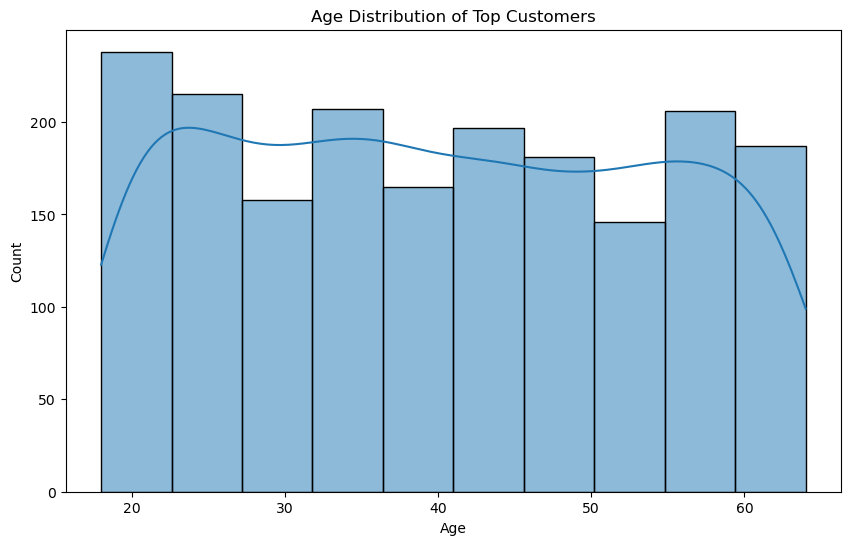

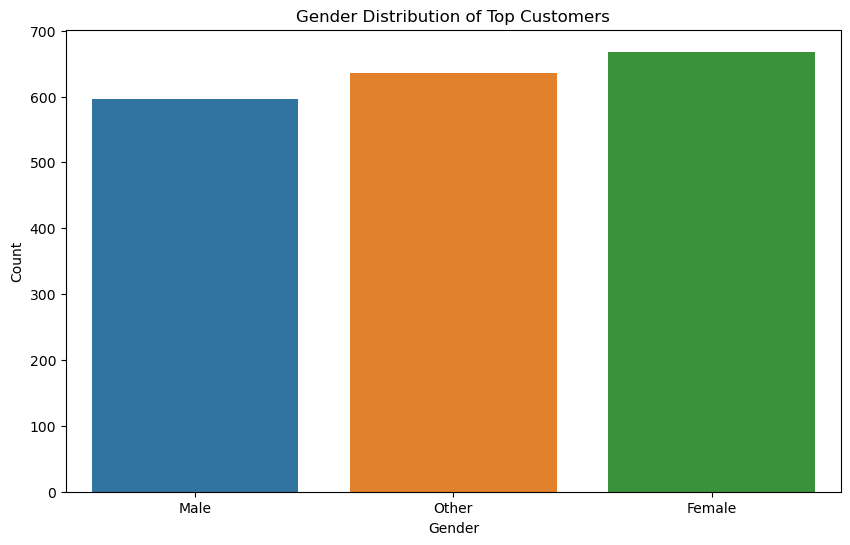

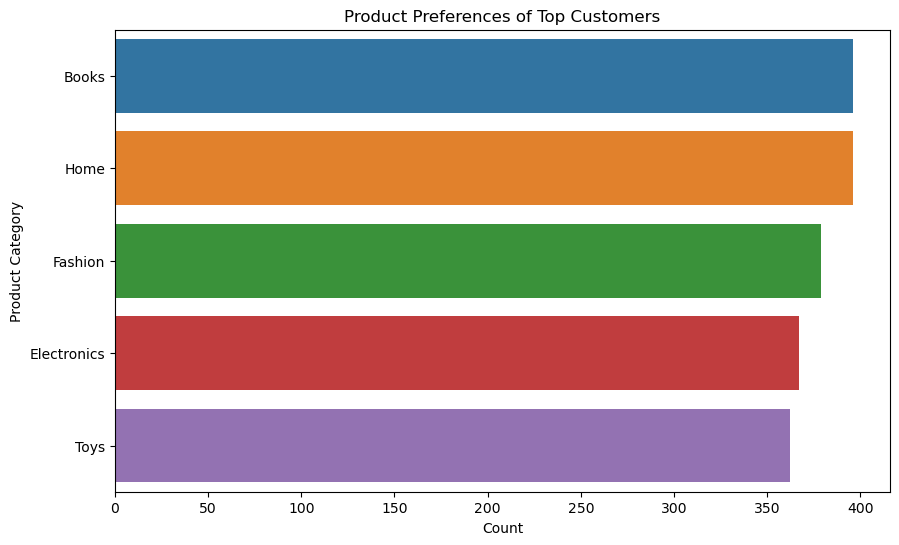

In [13]:
# I will have to analyze the characteristics of these top 10% customers

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution of top customers
plt.figure(figsize=(10, 6))
sns.histplot(top_customers['Age'], bins=10, kde=True)
plt.title('Age Distribution of Top Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution of top customers
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=top_customers)
plt.title('Gender Distribution of Top Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Product preferences of top customers
plt.figure(figsize=(10, 6))
sns.countplot(y='Product_Category', data=top_customers, order=top_customers['Product_Category'].value_counts().index)
plt.title('Product Preferences of Top Customers')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Marketing efforts can be specifically designed to appeal to middle-aged (30 - 50) males in particular, possibly with promotions on high-value electronics and toys.

Prioritizing stock for electronics and toys could ensure that high-demand products are always available to these valuable customers.

Additionally, creating personalized offers for these customers based on their buying patterns can increase customer loyalty and encourage higher spending.

# 2. What factors influence customer loyalty?

In [14]:
# Basic statistics
print(e_commerce[['Visit_Frequency', 'Customer_Loyalty_Score']].describe())

       Visit_Frequency  Customer_Loyalty_Score
count     19000.000000            19000.000000
mean          1.984684                4.970632
std           1.403577                2.590350
min           0.000000                1.000000
25%           1.000000                3.000000
50%           2.000000                5.000000
75%           3.000000                7.000000
max           9.000000                9.000000


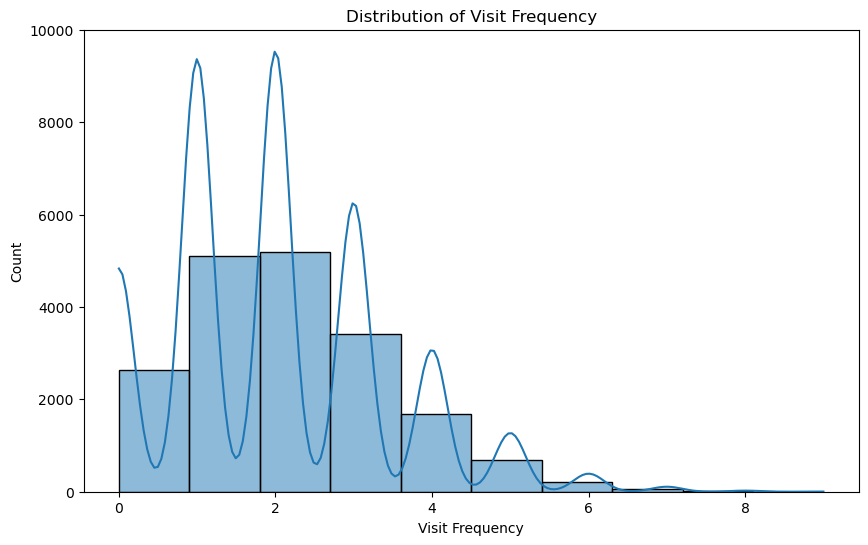

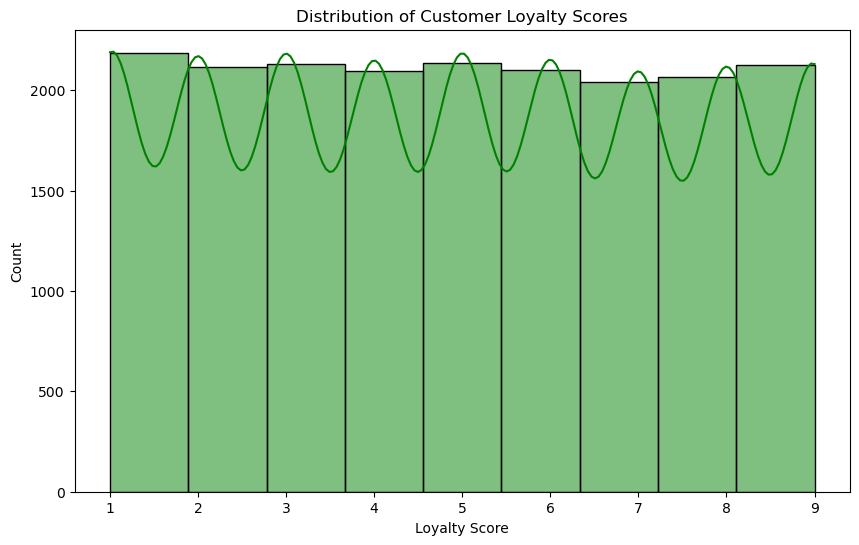

In [15]:
# Plotting distribution of visit frequency
plt.figure(figsize=(10, 6))
sns.histplot(e_commerce['Visit_Frequency'], bins=10, kde=True)
plt.title('Distribution of Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.show()

# Plotting distribution of loyalty scores
plt.figure(figsize=(10, 6))
sns.histplot(e_commerce['Customer_Loyalty_Score'], bins=9, kde=True, color='green')
plt.title('Distribution of Customer Loyalty Scores')
plt.xlabel('Loyalty Score')
plt.ylabel('Count')
plt.show()

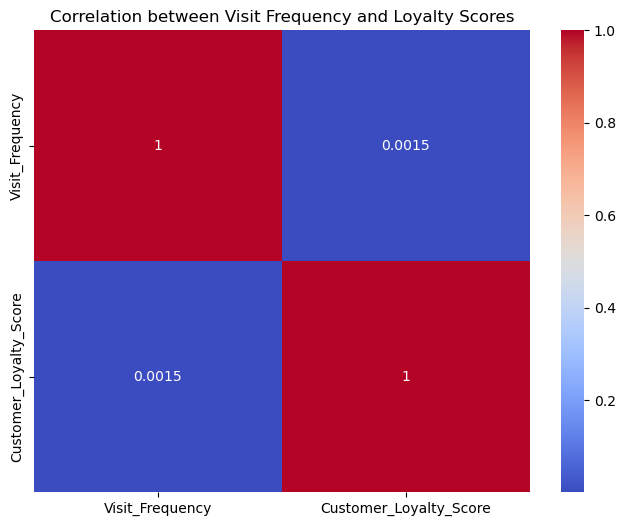

In [16]:
# Correlation plot; I will check if there's a correlation between visit frequency and loyalty scores
plt.figure(figsize=(8, 6))
sns.heatmap(e_commerce[['Visit_Frequency', 'Customer_Loyalty_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Visit Frequency and Loyalty Scores')
plt.show()

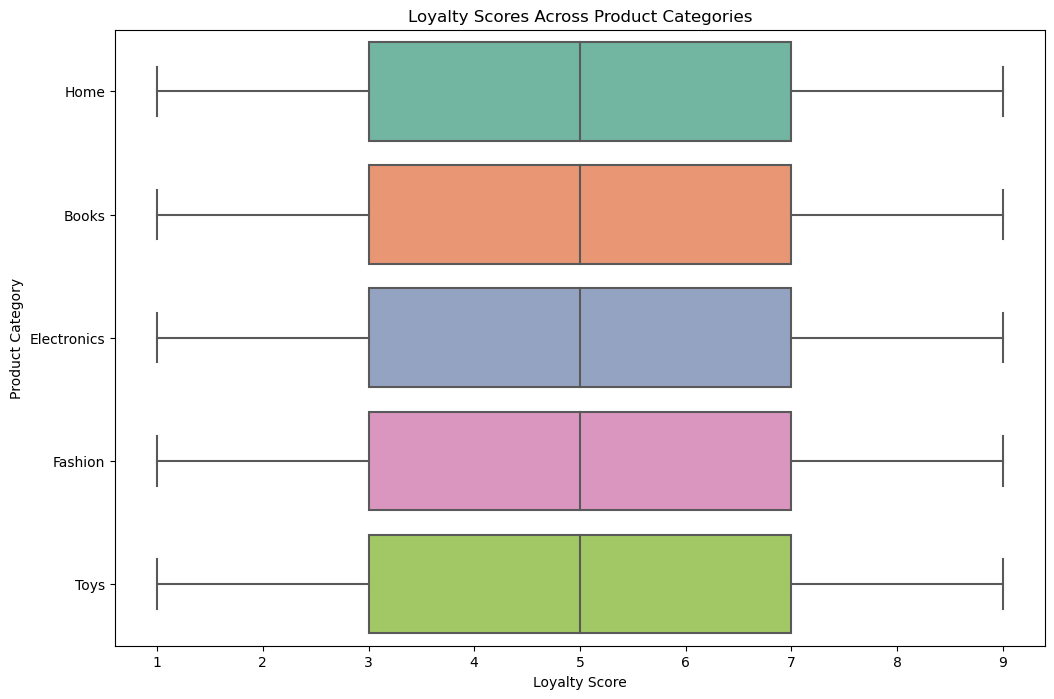

In [17]:
# Boxplot to see loyalty scores across different product categories i.e., to analyze how product categories relate to loyalty scores
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer_Loyalty_Score', y='Product_Category', data=e_commerce, palette='Set2')
plt.title('Loyalty Scores Across Product Categories')
plt.xlabel('Loyalty Score')
plt.ylabel('Product Category')
plt.show()

Initiatives to increase engagments and customer visit frequency, such as regular promotions, advertisements, personalized newsletters, or exclusive previews, could strengthen customer loyalty.

Focusing strategies for high-loyalty categories is neede. For example, categories with higher loyalty scores, such as electronics, investing in exclusive deals, better customer service, and expanded product ranges could help capitalize on this high loyalty.

Tailored marketing would be useful to adjust marketing influence based on product category affinity, to specifically target customers more effectively, enhance their overall experience and loyalty.

# 3. How does customer behavior vary by demographic?

In [18]:
# Categorizing age into bins; I will categorize customers into age groups to better analyze trends
e_commerce['Age_Group'] = pd.cut(e_commerce['Age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Overview of the new categorization
print(e_commerce['Age_Group'].value_counts())

Age_Group
46-55    4073
36-45    4068
26-35    4015
56-65    3636
18-25    3208
Name: count, dtype: int64


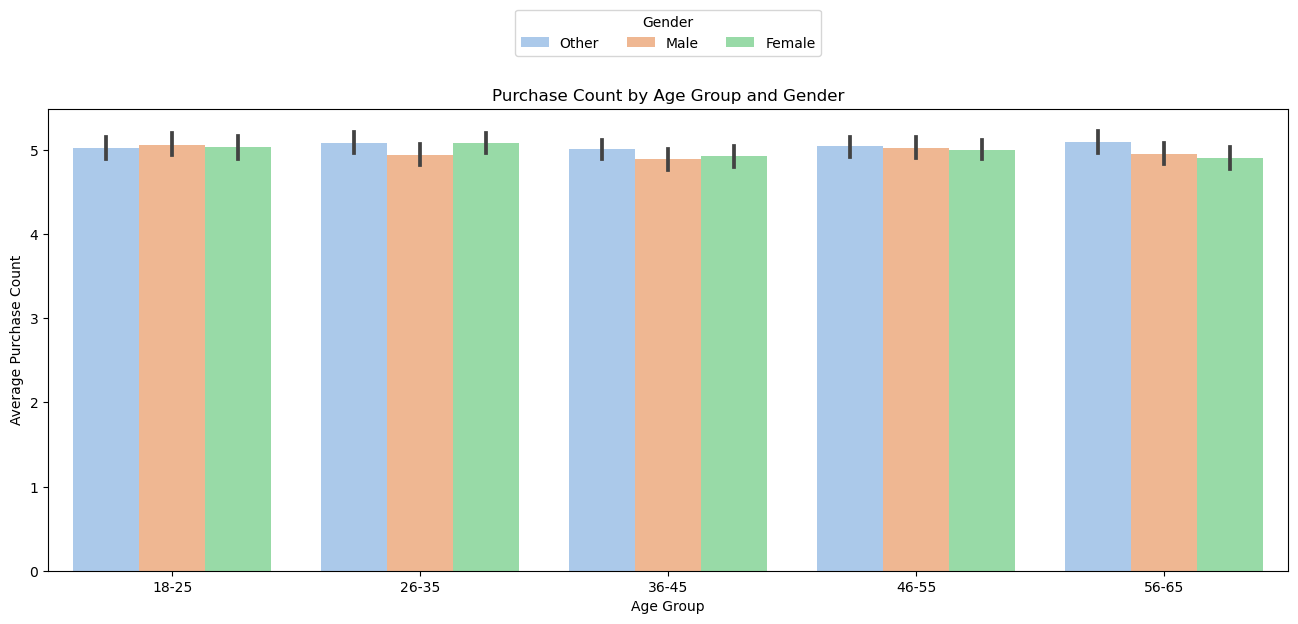

In [19]:
# I will now analyze purchase count by age group and gender

# Purchase count by age group and gender
plt.figure(figsize=(16, 6))
sns.barplot(x='Age_Group', y='Purchase_Count', hue='Gender', data=e_commerce, palette='pastel')
plt.title('Purchase Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Count')
plt.legend(title='Gender', loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.show()

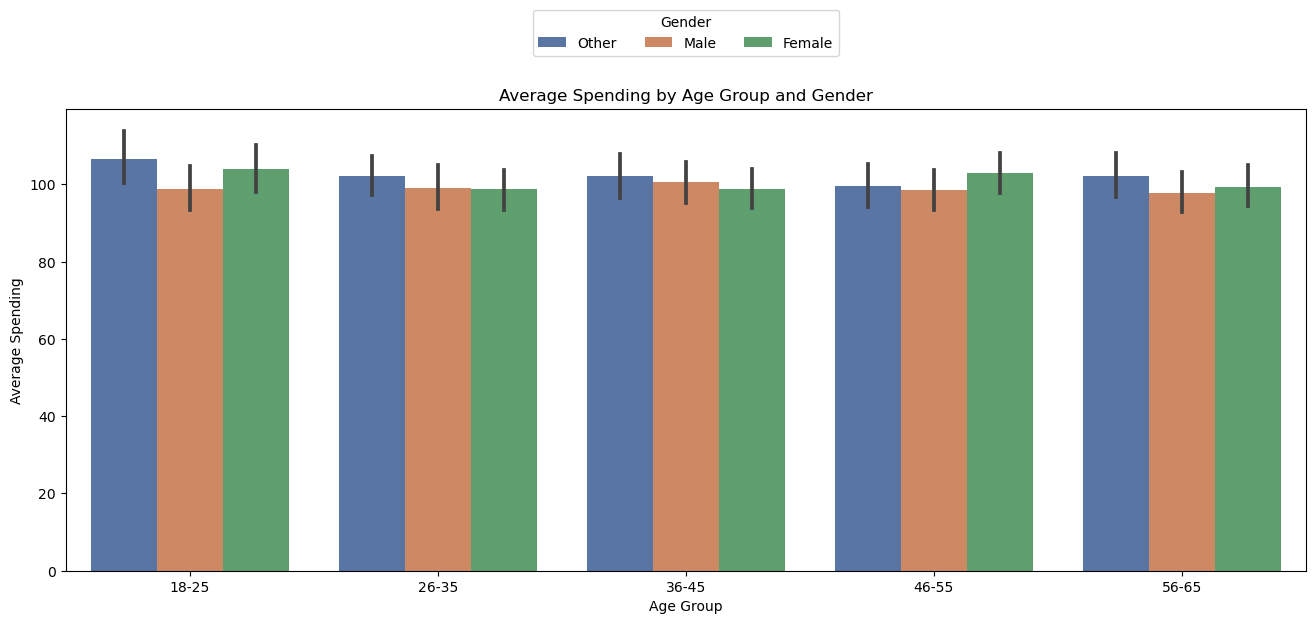

In [20]:
# Average spending by age group and gender
plt.figure(figsize=(16, 6))
sns.barplot(x='Age_Group', y='Average_Spending', hue='Gender', data=e_commerce, palette='deep')
plt.title('Average Spending by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.legend(title='Gender', loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.show()

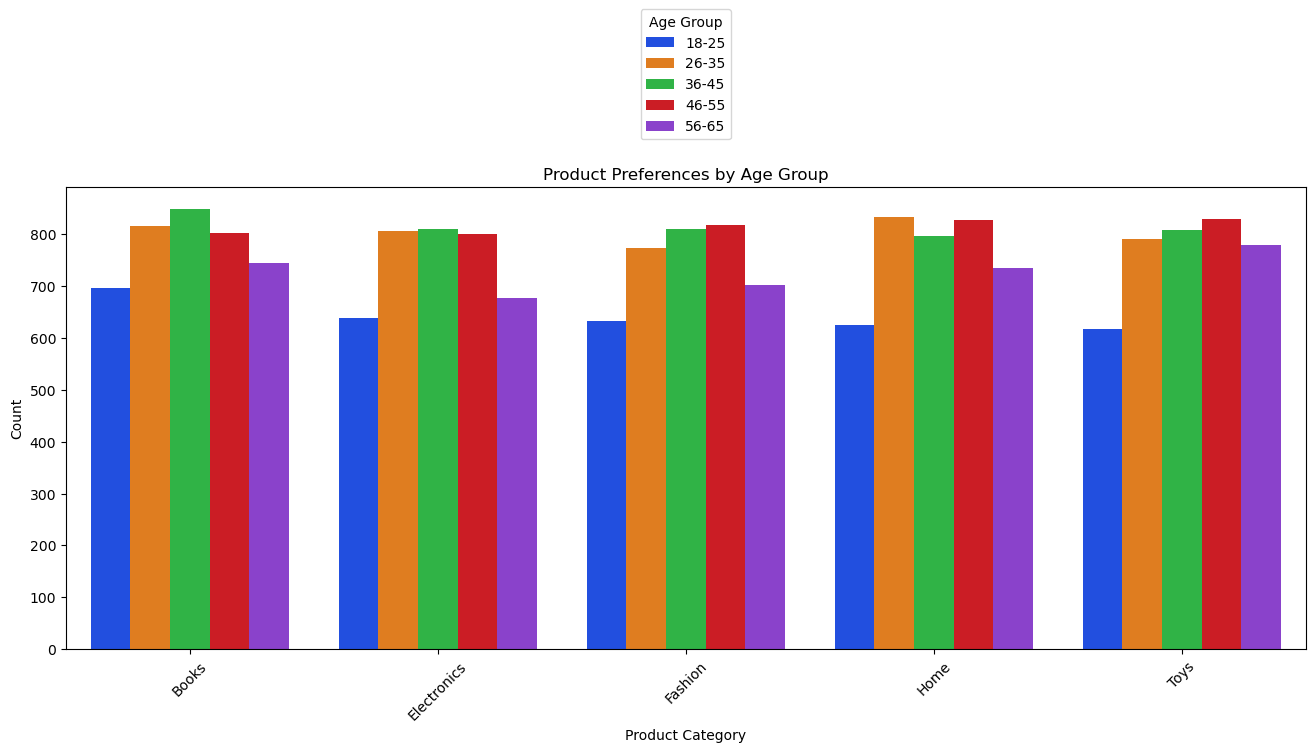

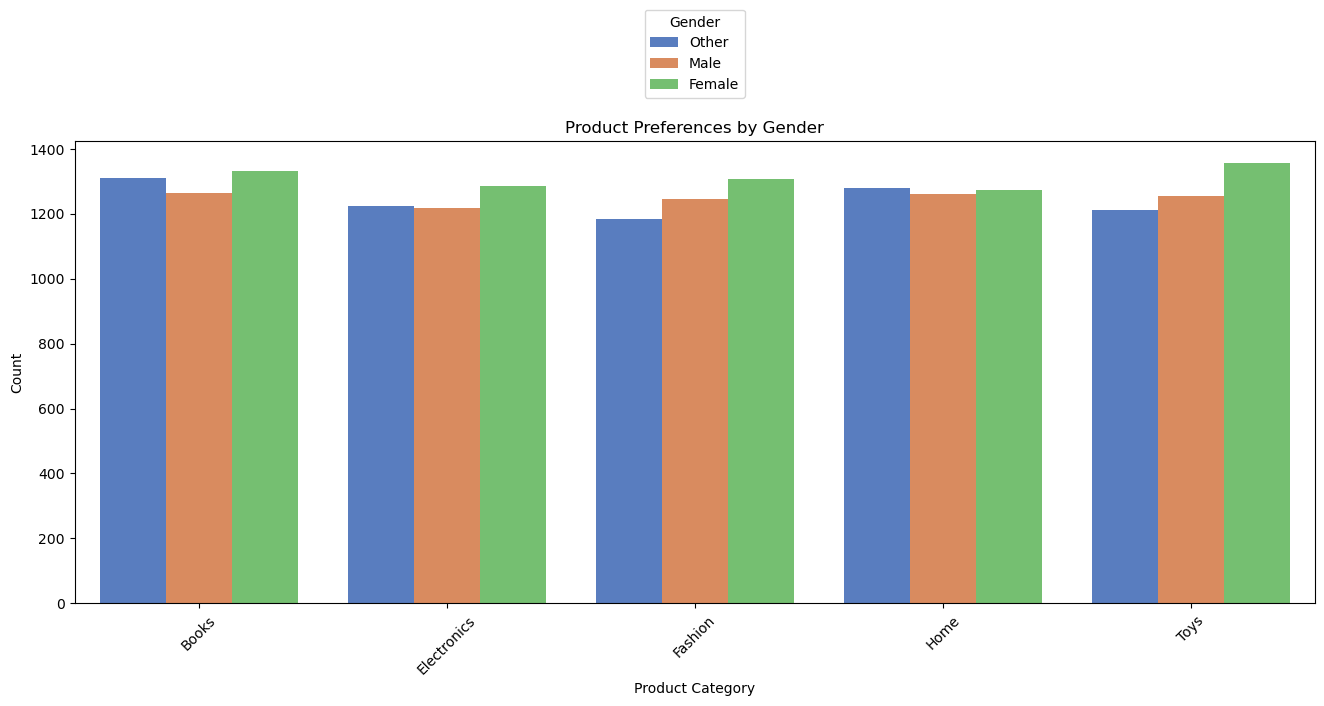

In [21]:
# Ensure that 'Product_Category' is treated as a categorical variable
e_commerce['Product_Category'] = e_commerce['Product_Category'].astype('category')

# Product preferences by age group
plt.figure(figsize=(16, 6))
sns.countplot(x='Product_Category', hue='Age_Group', data=e_commerce, palette='bright')
plt.title('Product Preferences by Age Group')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.legend(title='Age Group', loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=1)
plt.xticks(rotation=45)  # Rotate labels if they overlap

plt.show()

# Product preferences by gender
plt.figure(figsize=(16, 6))
sns.countplot(x='Product_Category', hue='Gender', data=e_commerce, palette='muted')
plt.title('Product Preferences by Gender')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=1)
plt.xticks(rotation=45)  # Rotate labels if they overlap

plt.show()

Younger age groups (18-25) and females tend to purchase more but spend less per transaction.

Older groups (46-65) spend more per transaction, but purchase less.

Tailored marketing strategies can be adjusted to target each demographic effectively. E.g., for younger groups, focus on volume via promotions, while for older groups, focus on high-value products.

Adjust stock levels and promotions based on the popularity of product categories within each demographic. For instance, if electronics are popular among males and fashion items among females, these sections can be emphasized differently in marketing campaigns.

Engage different age groups with strategies tailored to their preferences and spending behavior, such as loyalty programs for older customers who spend relatively more.

# 4. Can we predict future purchase behavior based on past activity?

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data encoding
encoder = LabelEncoder()
e_commerce['Gender'] = encoder.fit_transform(e_commerce['Gender'])

# Features and target
X = e_commerce[['Age', 'Gender', 'Average_Spending', 'Visit_Frequency', 'Customer_Loyalty_Score']]
y = e_commerce['Purchase_Count']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# I need to build and import the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_reg = reg_model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error of Linear Regression: {mse}")

Mean Squared Error of Linear Regression: 4.970271588073503


In [24]:
# Next, I will try to build a decision tree for comparison
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate the model's performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Mean Squared Error of Decision Tree: {mse_tree}")

Mean Squared Error of Decision Tree: 5.024506406742013


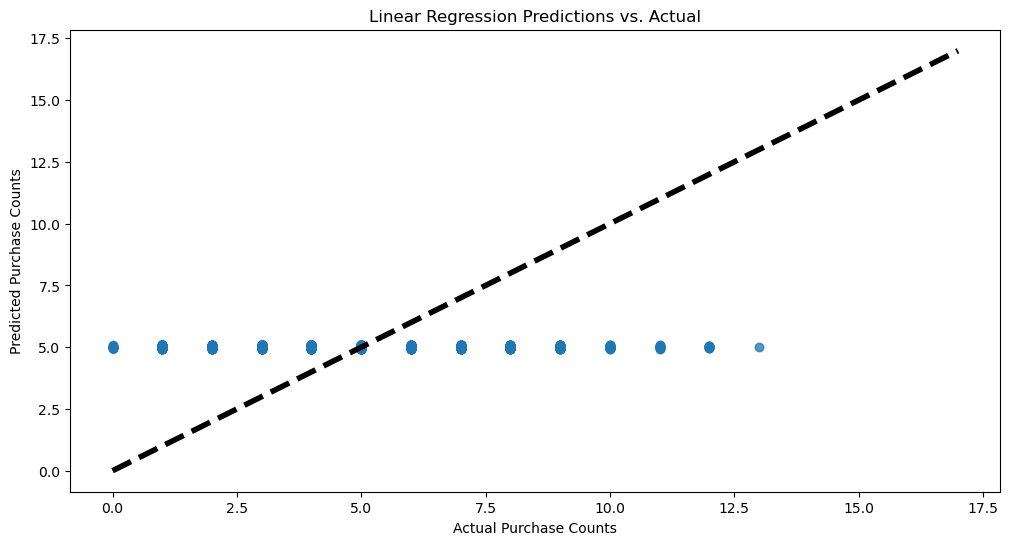

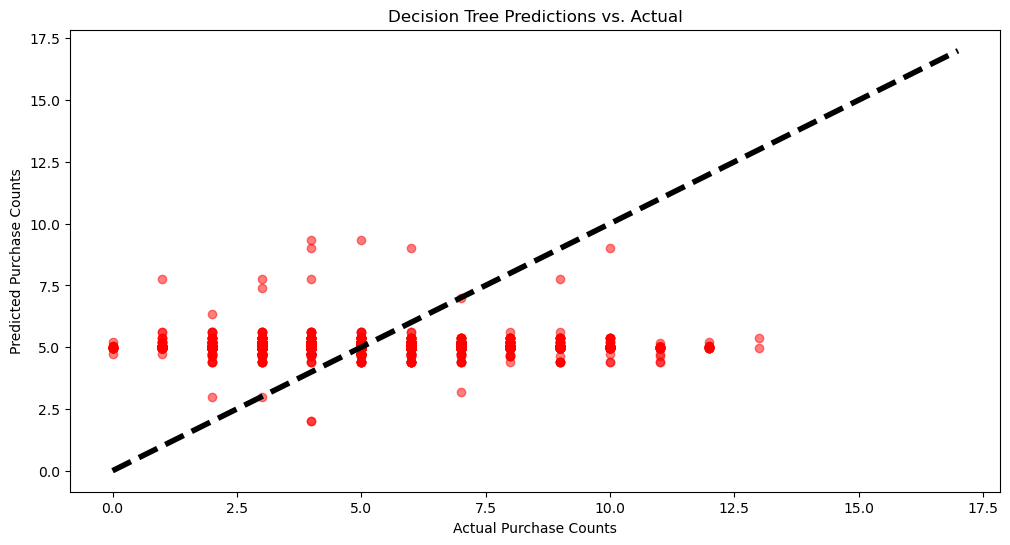

In [25]:
# Plotting actual vs. predicted values for linear regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Purchase Counts')
plt.ylabel('Predicted Purchase Counts')
plt.title('Linear Regression Predictions vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

# Plotting actual vs. predicted values for decision tree
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='red')
plt.xlabel('Actual Purchase Counts')
plt.ylabel('Predicted Purchase Counts')
plt.title('Decision Tree Predictions vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

Both models provide insights into how well they can predict future purchasing behavior based on the features provided.

The linear regression significantly outperforms the decision tree model (as seen by a lower MSE); there is a clear non-linear relationship.

Key predictors like Visit_Frequency and Customer_Loyalty_Score could be particularly influential, which can guide strategies to enhance these aspects. This is a speculative suggestion though!

# 5. What are the common segments of customers and how can marketing be tailored to each?

In [26]:
# First, prepare the data for clustering, including selecting relevant features and normalizing the data
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features = e_commerce[['Age', 'Gender', 'Average_Spending', 'Visit_Frequency', 'Customer_Loyalty_Score']]
features['Gender'] = LabelEncoder().fit_transform(features['Gender'])

# Normalizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

C:\Users\Mr. Seedball\AppData\Local\Temp\ipykernel_12196\850205779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = LabelEncoder().fit_transform(features['Gender'])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

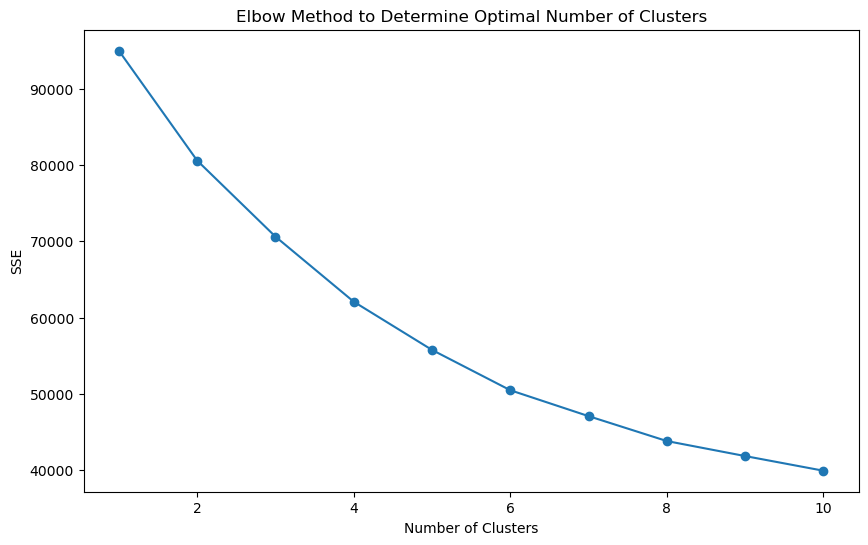

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Use the K-means algorithm to identify clusters in the dataset
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the elbow point is found at k = 3 (example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
e_commerce['Cluster'] = clusters

         Customer_ID        Age    Gender  Purchase_Count  Average_Spending  \
Cluster                                                                       
0        9526.607028  29.082529  0.985152        5.018065         68.936577   
1        9461.776078  52.968682  0.982775        4.979162         69.767267   
2        9542.735856  40.524083  0.968654        5.018349        297.139983   

         Visit_Frequency  Last_Visit  Customer_Loyalty_Score  Customer_Value  
Cluster                                                                       
0               2.059886   14.904727                4.911408      346.166963  
1               1.917731   14.909781                5.046977      346.353844  
2               1.964832   14.766437                4.911315     1488.694637  


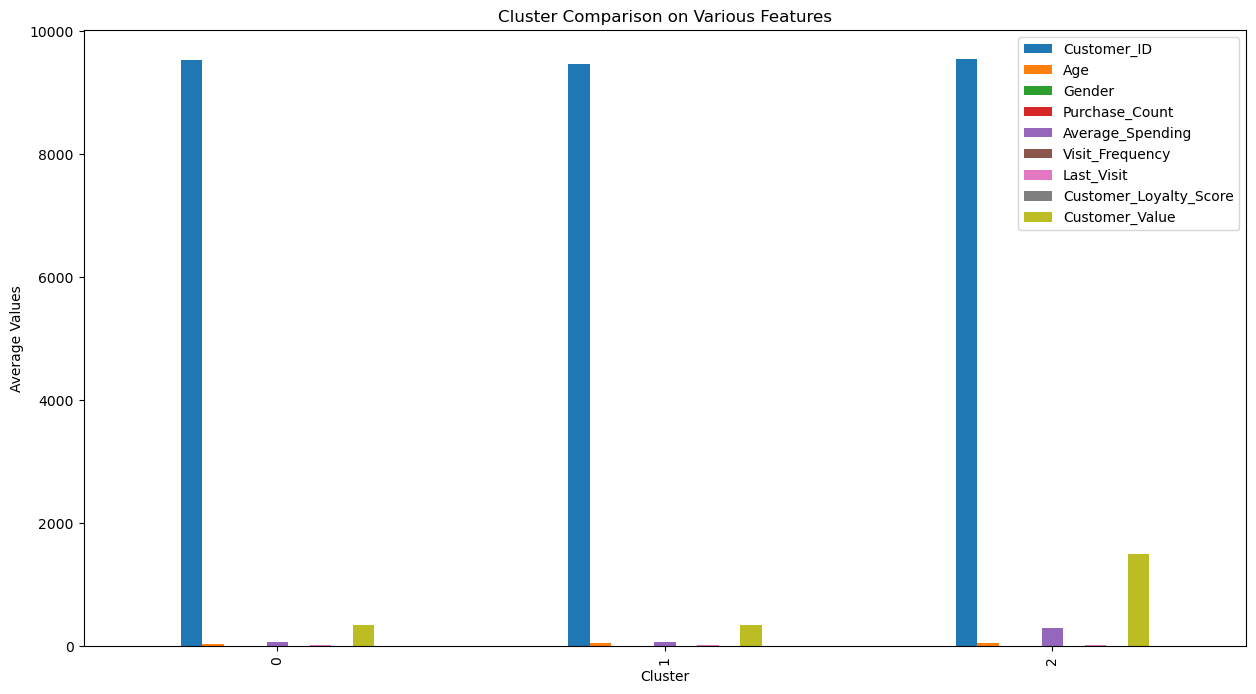

In [28]:
# Grouping data by cluster to see the means of each feature
# Selecting only numeric columns before grouping
numeric_data = e_commerce.select_dtypes(include=['number'])
cluster_groups = numeric_data.groupby('Cluster').mean()
print(cluster_groups)

# Visualize the differences
cluster_groups.plot(kind='bar', figsize=(15, 8))
plt.title('Cluster Comparison on Various Features')
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.show()

My result represents a clustering of customers into three groups based on various attributes. Cluster 0 and 1 consist of younger and older customers respectively, with similar purchase counts, average spending of around 70USD, and a comparable customer value of around 346USD. 

Cluster 2, which has a middle-age average, notably differs by having a much higher average spending per visit at 297USD, and a significantly greater customer value of 1488USD. This indicates that this group might be the most lucrative target for marketing strategies.

Now for a segment that scores high in loyalty but has lower spending, introduce referral bonuses to increase their spending and bring in new customers. For high-value customers, personalized shopping experiences or dedicated support lines could enhance satisfaction and increase their lifetime value.

# The end...!